<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Ridge_Regularization_(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
files=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [3]:
data = pd.read_csv("Salary_Data.csv")
data


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# input 
X = pd.DataFrame(data['YearsExperience'])

#output 
Y = pd.DataFrame(data['Salary'])

In [5]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [6]:
Y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [7]:
#Splitting data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.10,random_state=0)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((27, 1), (27, 1), (3, 1), (3, 1))

In [8]:
y_train

,Salary
10,63218.0
26,116969.0
24,109431.0
27,112635.0
11,55794.0
17,83088.0
22,101302.0
5,56642.0
16,66029.0
8,64445.0


In [9]:
# Apply Linear Regression Model 
from sklearn.linear_model import LinearRegression
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
pred_train=lreg.predict(x_train)


In [10]:
# calculating Mean Squared Error (mse) for Test Data
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# calculating Mean Squared Error (mse) for Train Data
mean_squared_error1 = np.mean((pred_train - y_train)**2) 
print("Mean squared Error on train set : ", mean_squared_error1)

Mean squared Error on test set :  Salary    2.395471e+07
dtype: float64
Mean squared Error on train set :  Salary    3.229485e+07
dtype: float64


In [11]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.DataFrame(lreg.coef_) 
lreg_coefficient


,Columns,Coefficient Estimate
0,YearsExperience,9377.715813


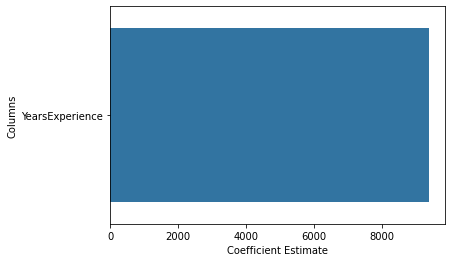

In [12]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [15]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.DataFrame(ridgeR.coef_) 
ridge_coefficient

Salary    2.453189e+07
dtype: float64


,Columns,Coefficient Estimate
0,YearsExperience,9329.295724


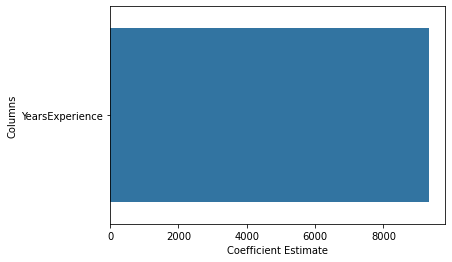

In [16]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)